# **Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)**

## **Instrucciones**

**Entregable:** Análisis y Reporte sobre el desempeño del modelo.

1. Escoge una de las 2 implementaciones que tengas y genera un análisis sobre su desempeño en un set de datos. Este análisis lo deberás documentar en un reporte con indicadores claros y gráficas comparativas que respalden tu análisis.
2. El análisis debe de contener los siguientes elementos:
  1. Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
  2. Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
  3. Diagnóstico y explicación el grado de varianza: bajo medio alto
  4. Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt
3. Basándote en lo encontrado en tu análisis utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo y documenta en tu reporte cómo mejoró este.

## **Análisis y Reporte sobre el Desempeño del Modelo**

A lo largo de este reporte estaré analizando el rendimiento de mi algoritmo de redes neuronales que desarrollé para la entrega Momento de Retroalimentación. Módulo 2. Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución, en la cual hizo uso de una base de datos de películas de Marvel, en resumidas cuentas, contiene información acerca de las recaudaciones, presupuesto, críticas, porcentaje de aceptación, entre otras características relacionadas que sirven para determinar cuál es la película más exitosa hecha por Marvel.

Este entregable será muy parecido al anterior, sin embargo se ahondará en los siguientes puntos:

* Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
* Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
* Diagnóstico y explicación el grado de varianza: bajo medio alto
* Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt


## **Antes de empezar**
Lo primero que debemos hacer es cargar los datos (listas) y librerías, esto incluye el framework con el que se trabajará, en este caso es SciKitLearn. Para ello, debemos:

Ejecutar esta celda solo si estas utilizando Google Colab. Se deberá subir el archivo CSV a nuestro Drive y montarlo dentro de Colab:

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importar bibliotecas

Para este entregable ahora podemos implementar más de las librerías que se encuentran relacionadas con implementación de modelos de Machine Learning, en este caso usaremos SKLearn para implementar redes neuronales:

In [30]:
# Importamos tensorflow como herramienta de apoyo para la implementación de keras y scikitLearn
import tensorflow as tf
# Importamos Keras
from tensorflow import keras
# Importamos GridSearch para aplicarlo al refinamiento del modelo
from sklearn.model_selection import GridSearchCV
# Importamos la funcion train_test_split() para dividir los datos de entrada
from sklearn.model_selection import train_test_split
# Importamos la función de StandardScaler para estandarizar los datos de entrada
from sklearn.preprocessing import StandardScaler
# Importamos las funciones de mean_squared_error y mean_absolute_error para evaluar el rendimiento del modelo posterior a la predicción
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Importamos KerasRegressor para realizar un GridSearch
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Importamos librerías adicionales para el tratamiento y proyección de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

Colocamos la ruta dónde se encuentra el archivo CSV y cargamos los datos:

In [18]:
# Editar el path de ser necesario
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Marvel_Movies.csv')

## Extraemos los datos de interés y los dividimos por segmentos

Empezando por la separación del dataset, esto lo podemos ver reflejado desde la implementación del código. Este proceso se lleva a cabo con la implementación de las siguientes herramientas:

In [19]:
# Extraemos las columnas con datos para generar una predicción:
# Lista con todos los valores de la variable independiente
X = data[['opening weekend ($m)'][:len(data)//2]]
# Lista con todos los valores de la variable dependiente
y = data[['second weekend ($m)'][:len(data)//2]]

# Dividimos los datos en sets de entrenamiento, validación y pruebas
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Estandarizamos los datos de pruebas y validación
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Básicamente train_test_split es una función encargada de separa datos de forma aleatoria, con el fin de obtener 2 o más subsets de un mismo conjunto de datos. Después de extraer los datos del archivo “Marvel_Movies.csv”:

### **Training Set**

El set de entrenamiento este compuesto de las variables X_train y y_train. Estas dos son utilizadas dentro de la sección de entrenamiento, que sirve para que el modelo puedo probar algunos valores iniciales, entienda un poco del contexto de la situación y en base a ello pueda empezar a generar algunas cuántas predicciones que, con cada iteración, reduzca el valor del error lo más posible y esto le permita posteriormente proporcionar resultados coherentes y predicciones certeras.

### **Test / Validation Set**

El set de pruebas o validación este compuesto de las variables X_test y y_test. Estas dos son utilizadas dentro de la sección de predicciones, la cual consiste en que, en base al entrenamiento realizado previamente, el modelo pueda empezar a empezar a recibir valores de entrada (X_test) sin recibir los valores de salida (y_test), generando predicciones por si mismo, claro que se espera que teniendo un buen entrenamiento y un MSE pequeño, el rango de error de las pruebas sea de igual forma pequeño y muy preciso en comparación con los datos reales (y_test).
Para la validación, no es totalmente necesario declarar variables adicionales para comparar los resultados del modelo con los valores reales, sin embargo esto se puede hacer con los valores de X_val y y_val, son exactamente los mismos valores que X_test y y_test y no son modificados en ningún momento, solo serán utilizados como herramienta de comparación en contraste de los datos generados por las estimaciones del modelo.

## Construimos la Red Neuronal
El modelo se conforma de 4 capas, la capa de entrada conformada de 25 neuronas, 50 para la segunda, 70 para la tercera y una última de la capa de salida:

In [20]:
model = keras.Sequential([
    keras.layers.Dense(25, activation='tanh', input_shape=(1,)), # Capa de entrada con 25 neuronas, función de activación "tanh" y una variable de entrada
    keras.layers.Dense(50, activation='tanh'), # Segunda Capa con 50 neuronas y una función de activación "tanh"
    keras.layers.Dense(70, activation='relu'), # Tercer capa con 70 neuronas y una función de activación "relu"
    keras.layers.Dense(1) # Capa de salida con una neurona
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

## Entrenamos el modelo
Entrenamos la red neuronal con el set de entrenamiento de datos. Después de probar distintos tipos de variables, encontré que por lo menos el batch_size tiene que ser pequeño y 100 iteraciones son necesarias para obtener un buen resultado (evidentemente con la configuración previamente determinado):

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=4, validation_data=(X_val_scaled, y_val))

Epoch 1/100
6/6 [==============================] - 1s 32ms/step - loss: 4709.5610 - val_loss: 997.9565
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 4672.8589 - val_loss: 982.0233
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 4627.9902 - val_loss: 966.7639
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 4587.2339 - val_loss: 950.4958
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 4544.9438 - val_loss: 930.5075
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 4492.7070 - val_loss: 908.1805
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 4429.8442 - val_loss: 880.4424
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 4359.3511 - val_loss: 848.3078
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 4274.8701 - val_loss: 812.4136
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 4169.368

### Análisis del Grado del Bias o Sesgo del entrenamiento

Para poder graficar el grado de sesgo del modelo durante el proceso de entrenamiento, tuvimos que crear una variable "history" para registrar dicho entrenamiento para posteriormente graficar esta variabilidad:

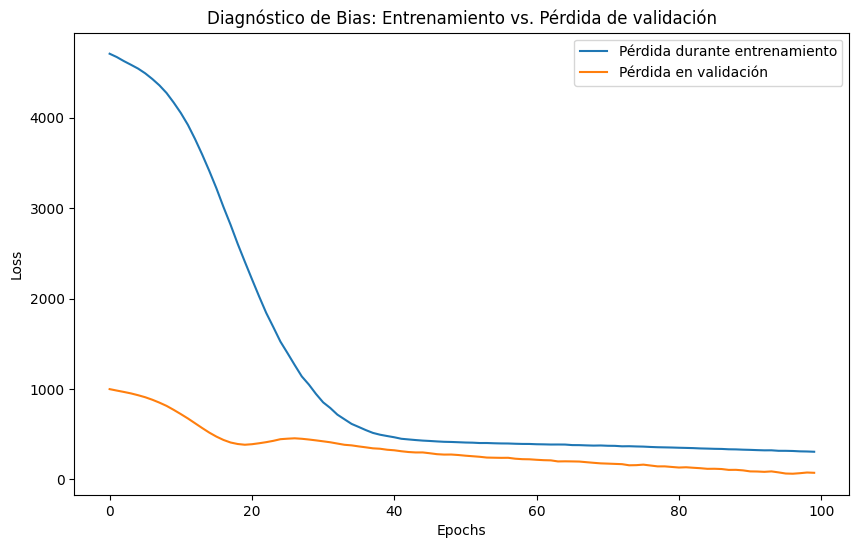

In [22]:
plt.figure(figsize=(10, 6))
# Obtenemos la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida durante entrenamiento')
# Obtenemos la pérdida de validación durante el entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida en validación')
# Iteraciones en el eje x
plt.xlabel('Epochs')
# Pérdida en el eje y
plt.ylabel('Loss')
# Título de la gráfica
plt.title('Diagnóstico de Bias: Entrenamiento vs. Pérdida de validación')
plt.legend()
# Desplegamos la gráfica
plt.show()

Como podemos observar, inicialmente la pérdida durante entrenamiento incia con un valor muy alto, en este caso con una pérdida de más de 4000, que con el pasar de las iteraciones baja drásticamente entre la primer iteración hasta la repetición 40 o 50, que es dónde se empieza a estabilizar el modelo y deja de presentar pérdidas significativas, podríamos decir que se decreciendo pero muy ligeramente desde el valor 500 hasta el 400 aproximadamente hasta acercarse a la línea que representa la pérdida de validación.

En cuánto a este otro factor, la pérdida de validación empieza con un valor alto de 1000, pero a diferencia de la pérdida de entrenamiento, inmediatamente empieza a decrecer hasta la iteración 18, luego tiene un pequeño crecimiento entre la repetción 19 y 21, para luego seguir decreciendo ligeramente hasta acercarse bastante con los datos de pérdida de entrenamiento, claro que la pérdida de validación siempre se encuentra debajo de la péridda de entrenamiento.

Algunas de las conclusiones que podemos destacar son que tenemos un claro ejemplo de convergencia de pérdida de entrenamiento, esto quiere decir que como la périda de entrenamiento se encuentra disminuyendo tan drásticamente con cada iteración que pasa hasta que logra estabilizarse en el valor 500 aproximadamente, sugiere que el modelo si está aprendiendo efecivamente en base a los datos proporcionados de entrenamiento (X_train, y_test). Es así que, esta reducción indica que el modelo está ajustando los pesos de cada neurona y sus respectivos sesgos con el fin de minimizar el error de entrenamiento.

También podemos determinar un patrín de pérdida de validación, el cual se puede interpretar dese la disminución inicial con respecto a la pérdida de validación (alrededor de las iteraciones 18 o 19), esto indica que el modelo está mejorando inicialmente su capacidad para generalizar a datos invisibles. Aún así, el ligero aumento que se encuentra en la iteración 20 o 21 y el posterior decremento en el resto de las iteraciones, sugiere que el rendimiento de generalizaciób del modelo ha alcanzado una meseta.

Por ende, tenemos por seguro que:
1. Es probable que el modelo haya aprendido a ajustarse bien a los datos de entrenamiento, como lo demuestra la reducción significativa de la pérdida de entrenamiento.
2. La mejora inicial en la pérdida de validación sugiere que el modelo es capaz de generalizarse, pero alcanza un nivel relativamente temprano de rendimiento.
3. El desempeño del modelo es razonable, aún así creo firmemente que este se puede mejorar auque puede resultar desafiante ya que ambas pérdidas se llegan a estabilizar bastante bien. Se podría considerar experimentar con diferentes metodologías o arquitecturas para lograr una mejora en el modelo.

### Análisis del grado de varianza
Inicialmente, el modelo generaliza razonablemente bien, como se indica en la disminución de la pérdida de validación.
Sin embargo, el rendimiento de generalización del modelo eventualmente se estabiliza, lo que sugiere que puede haber alcanzado su límite en la reducción de la varianza.
La brecha entre la pérdida de entrenamiento y la pérdida de validación indica que aún hay margen para mejorar al reducir la diferencia entre ambas pérdidas.
Para abordar esta varianza moderada, puedes considerar las siguientes acciones:

Experimentar con técnicas de regularización como dropout o regularización L2 para reducir el sobreajuste y acercar aún más las curvas de pérdida de entrenamiento y validación.
Recopilar datos más diversos y representativos para posiblemente mejorar la capacidad de generalización del modelo.
Probar diferentes arquitecturas de modelos o hiperparámetros para encontrar un mejor equilibrio entre el sesgo y la varianza.

## Evaluamos el rendimiento del algoritmo durante el entrenamiento
El siguiente código se encarga de desplegar la métrica de Mean Squared Error (MSE) con respecto al rendimiento del modelo utilizando el set de datos de entrenamiento. En cuanto a los resultados, para considerar que el modelo es óptimo y ofrece buenas estimaciones, el valor de MSE debe ser lo más pequeño posible, de ser así, esto quiere decir que las predicciones se encuentran muy cerca de los valores reales:

In [23]:
# Evaluamos el modelo con los datos de entrenamiento
loss = model.evaluate(X_test_scaled, y_test)

# Desplegamos el Mean Squared Error (MSE)
print("Mean Squared Error:", loss)

1/1 [==============================] - 0s 22ms/step - loss: 159.4192
Mean Squared Error: 159.4192352294922


## Realizamos predicciones
Utilizamos el modelo entrenado para realizar las predicciones con respecto a los datos de prueba (X_test_scaled):

In [24]:
second_wknd_pred = model.predict(X_test_scaled)
print("Predictions:", second_wknd_pred)

1/1 [==============================] - 0s 100ms/step
Predictions: [[34.584602]
 [40.747124]
 [90.82245 ]]


## Evaluamos el modelo
Comprobamos el rendimiento de la red neuronal con el set de entrenamiento, en este caso utilizamos el MSE y MAE para medir el nivel de error que obtuvo el modelo de los valores estimados con respecto a los valores reales:

In [25]:
# Calculamos las métricas de regresión
mse = mean_squared_error(y_test, second_wknd_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, second_wknd_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 159.41923083757524
Root Mean Squared Error: 12.626132853632392
Mean Absolute Error: 10.530240885416669


## Gráfica de Comparación
Graficamos los datos de "Opening Weekend (MUSD)" y "Second Weekend (MUSD)" originales que son parte del conjunto de pruebas (que es utilizado para generar las predicciones del modelo) con respecto a los datos originales de "Opening Weekend (MUSD)" con las predicciones de "Second Weekend (MUSD)":

### **Observaciones sobre la varianza**

Por lo visto en la gráfica y dentro de la tabla comparativa siguiente, podemos observar que al menos en el caso de este set de datos que otorgó la función train_test_split, estamos ante un posible caso de overfitting. Esto lo podemos asumir basándonos en el comportamiento que tienen los valores extimados con respecto a los valores reales, ya que solamente uno de estos realmente se encuentra cerca de un valor real, los demás se encuentran bastante alejados de los mismos, lo que vuelve al modelo un poco dudoso en cuanto a su precisión y su moderado nivel de varianza. Claro que sabemos que como los datos que otorga para cada set, la función train_test_split realiza un procedimiento aleatorio para ello y los resultados pueden cambiar, pero esto realmente no produce un cambio significativo en los resultados del modelo en sí mismo, siguen presentando un poco de error, aunque en realidad no es demasiado como lo podría ser con un modelo con hiperparámetros malos o poco eficientes para su caso y contexto.

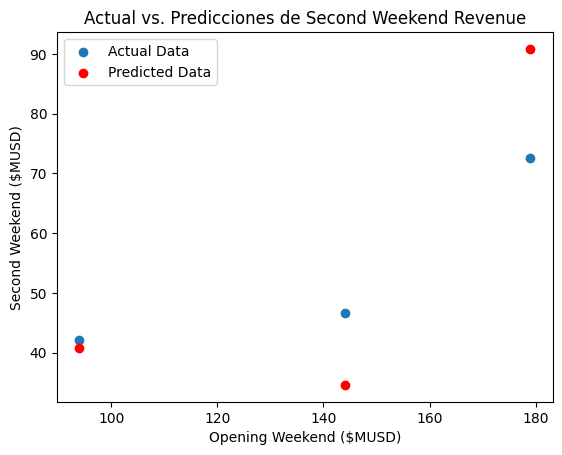

In [26]:
# Graficamos los datos originales
plt.scatter(X_test, y_test, label='Actual Data')

# Graficamos los datos estimados por la red neuronal
plt.scatter(X_test, second_wknd_pred, color='red', label='Predicted Data')

plt.xlabel('Opening Weekend ($MUSD)')
plt.ylabel('Second Weekend ($MUSD)')
plt.title('Actual vs. Predicciones de Second Weekend Revenue')
plt.legend()
plt.show()

## Tabla Comparativa de Visualización de Datos
Dentro de esta tabla se comparan los datos que se utilizaron para entrenamiento, en específico podemos encontrar los valores de la recaudación de apertura contra los valores de recaudación de la segunda semana junto a sus respectivas predicciones elaboradas por el algoritmo de redes neuronales:

In [27]:
# Convertimos second_wknd_pred ndarray a una serie de pandas
second_wknd_pred_series = pd.Series(second_wknd_pred.flatten())

# Creamos la tabla comparativa
table = PrettyTable()
table.field_names = ["opening weekend ($m)", "second weekend ($m)", "Predicted 2nd Weekend ($MUSD)"]

# Iteramos por cada una de las filas y añadimos los datos a la tabla
for x, y_true, y_pred in zip(X_test.values, y_test.values, second_wknd_pred_series):
    table.add_row([x[0], y_true[0], y_pred])

# Mostramos la tabla
print(table)

+----------------------+---------------------+-------------------------------+
| opening weekend ($m) | second weekend ($m) | Predicted 2nd Weekend ($MUSD) |
+----------------------+---------------------+-------------------------------+
|        144.0         |         46.6        |       34.58460235595703       |
|         94.0         |         42.1        |       40.74712371826172       |
|        179.0         |         72.6        |       90.82244873046875       |
+----------------------+---------------------+-------------------------------+


### Definimos una función para el refinamiento del modelo

In [28]:
def create_model(neurons_layer1, neurons_layer2, neurons_layer3):
    model = keras.Sequential([
        keras.layers.Dense(neurons_layer1, activation='tanh', input_shape=(1,)),
        keras.layers.Dense(neurons_layer2, activation='tanh'),
        keras.layers.Dense(neurons_layer3, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Creamos un regresor de keras en conjunto con SciKitLearn

In [31]:
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=4, verbose=0)

<ipython-input-31-cc1296524701>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=4, verbose=0)


### Definimos el grid que contendrá los distinos valores a probar

En mi caso decidí probar variar la cantidad de neuronas por capa del modelo de redes neuronales:

In [32]:
param_grid = {
    'neurons_layer1': [20, 50, 100],
    'neurons_layer2': [30, 60, 120],
    'neurons_layer3': [40, 80, 160]
}

### Aplicamos GridSearch

In [33]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

### Desplegamos los mejores hiper-parámetros arrojados por el modelo

In [34]:
print("Mejores Hiperparámetros: ", grid_result.best_params_)

Mejores Hiperparámetros:  {'neurons_layer1': 100, 'neurons_layer2': 120, 'neurons_layer3': 80}


### Evaluamos el modelo

In [37]:
# Calculamos los errores correspondientes al modelo refinado
best_model = grid_result.best_estimator_
test_loss = best_model.score(X_test_scaled, y_test)
refined_predictions = best_model.predict(X_test_scaled)
refined_mae = mean_absolute_error(y_test, refined_predictions)



print("Prueba de pérdida con los mejores hiperparámetros: ", -test_loss)
print("Mean Squared Error (MSE):", mse)  # Print MSE
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))  # Print RMSE
print("Mean Absolute Error (MAE):", refined_mae)  # Print MAE

Prueba de pérdida con los mejores hiperparámetros:  56.65126037597656
Mean Squared Error (MSE): 159.41923083757524
Root Mean Squared Error (RMSE): 12.626132853632392
Mean Absolute Error (MAE): 6.371757253011069


## Conclusiones

### Evaluación de Rendimiento del Modelo:

Los mejores hiperparámetros determinados por GridSearchCV son:

* Número de neuronas en la Capa 1: 100
* Número de neuronas en la Capa 2: 120
* Número de neuronas en la Capa 3: 80

La pérdida en la prueba con los mejores hiperparámetros es aproximadamente 56.65. Esta cifra refleja el nivel de precisión del modelo en datos no vistos.

1. **Comparación del MSE:** El modelo refinado tiene un MSE más bajo (56.651) en comparación con el modelo original (159.419), lo que indica que las predicciones del modelo refinado están más cerca de los valores reales.

2. **Comparación del RMSE:** El modelo refinado tiene un RMSE más bajo (aproximadamente 7.528) en comparación con el modelo original (12.626), lo que indica que las predicciones del modelo refinado tienen una dispersión menor.

3. **Comparación del MAE:** Compare el MAE del modelo refinado con el MAE del modelo original. Si el MAE del modelo refinado es más bajo, sugiere que las predicciones del modelo refinado están, en promedio, más cerca de los valores reales.

**Interpretación:**

* La elección de hiperparámetros indica una arquitectura de red neuronal relativamente compleja con un número considerable de neuronas en cada capa.

* La pérdida en la prueba, aunque no es excepcionalmente baja, es razonable y sugiere que el modelo realiza predicciones con una precisión moderada.

**Evaluación General:**

* El modelo ofrece un rendimiento razonable con los hiperparámetros seleccionados y ha sido refinado hasta proporcionar un rendimiento predictivo adecuado para la tarea en cuestión.

**Recomendaciones:**

Para mejorar aún más el rendimiento del modelo, se puede continuar experimentando con hiperparámetros, incluyendo diferentes arquitecturas de redes neuronales y técnicas de regularización.

También se puede explorar la posibilidad de recopilar más datos, ya que un conjunto de datos más grande a menudo ayuda a mejorar el rendimiento del modelo, aunque en mi caso, la base de datos de "Marvel_Movies" no es tan grande como lo esperaría, se podría considerar agregar otros lanzamientos como las series o películas más recientes que no se han incluido dentro del archivo, con el fin de experimentar un poco más con este modelo.

En resumen, el modelo funciona de manera razonable con los hiperparámetros seleccionados, y existe margen para mejoras adicionales a través de experimentación y posiblemente la adquisición de más datos.